In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
model_metadata = pd.read_csv("../../config/models.csv")
palette = model_metadata.set_index("description")["color"].to_dict()
model_renaming = model_metadata.set_index("name")["description"].to_dict()
model_metadata

,name,description,color
0,CADD,CADD,C0
1,GPN-MSA,GPN-MSA,C1
2,Borzoi,Borzoi,C2
3,Enformer,Enformer,C3
4,GPN,gLM-Promoter,C4
5,NucleotideTransformer,NT,C5
6,HyenaDNA,HyenaDNA,C6
7,Caduceus,Caduceus,C7
8,CADD+GPN-MSA+Borzoi,Ensemble,C8


In [8]:
dataset_renaming = {
    "mendelian_traits_matched_9": "Mendelian traits",
    "complex_traits_matched_9": "Complex traits",
}

subset_renaming = {
    #"maf_0_0.01": 0.01,
    #"maf_0.01_0.05": 0.05,
    #"maf_0.05_0.1": 0.1,
    "maf_0.0_0.1": 0.1,
    "maf_0.1_0.2": 0.2,
    "maf_0.2_0.3": 0.3,
    "maf_0.3_0.4": 0.4,
    "maf_0.4_0.5": 0.5,
}

In [9]:
datasets = [
    "complex_traits_matched_9",
]

subsets = [
    #"maf_0_0.01",
    #"maf_0.01_0.05",
    #"maf_0.05_0.1",
    "maf_0.0_0.1",
    "maf_0.1_0.2",
    "maf_0.2_0.3",
    "maf_0.3_0.4",
    "maf_0.4_0.5",
]

modalities = [
    "Zero-shot",
    "Linear probing",
]

models = [
    "Borzoi",
    "GPN-MSA",
    "CADD",
    "CADD+GPN-MSA+Borzoi",
]

def get_model_path(model, modality, dataset, subset):
    if modality == "Linear probing":
        predictor = f"{model}.LogisticRegression.chrom.subset_from_all"
    elif modality == "Zero-shot":
        if model == "CADD":
            predictor = "CADD.plus.RawScore"
        elif model in ["Enformer", "Borzoi"]:
            predictor = f"{model}_L2_L2.plus.all"
        else:
            if "mendelian" in dataset:
                llr_version = "LLR"
                sign = "minus"
            elif "complex" in dataset:
                llr_version = "absLLR"
                sign = "plus"
            predictor = f"{model}_{llr_version}.{sign}.score"
    return f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/{subset}/{predictor}.csv"

In [10]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for modality in modalities:
            for model in models:
                if modality == "Zero-shot" and "+" in model: continue
                model_for_path = model
                if "mendelian" in dataset and model == "CADD+GPN-MSA+Borzoi":
                    model_for_path = "CADD+GPN-MSA_LLR+Borzoi_L2_L2"
                path = get_model_path(
                    model_for_path,
                    modality,
                    dataset,
                    subset
                )
                df = pd.read_csv(path).iloc[0]
                rows.append([
                    dataset_renaming.get(dataset, dataset),
                    subset_renaming.get(subset, subset),
                    modality,
                    model_renaming.get(model, model),
                    df["score"],
                    df["se"],
                ])
df = pd.DataFrame(rows, columns=["dataset", "subset", "modality", "model", "score", "se"])
df

,dataset,subset,modality,model,score,se
0,Complex traits,0.1,Zero-shot,Borzoi,0.288617,0.015035
1,Complex traits,0.1,Zero-shot,GPN-MSA,0.270463,0.019092
2,Complex traits,0.1,Zero-shot,CADD,0.315416,0.020920
3,Complex traits,0.1,Linear probing,Borzoi,0.344818,0.021717
4,Complex traits,0.1,Linear probing,GPN-MSA,0.312260,0.019610
5,Complex traits,0.1,Linear probing,CADD,0.336825,0.022156
6,Complex traits,0.1,Linear probing,Ensemble,0.413129,0.024766
7,Complex traits,0.2,Zero-shot,Borzoi,0.237647,0.015733
8,Complex traits,0.2,Zero-shot,GPN-MSA,0.294920,0.024563
9,Complex traits,0.2,Zero-shot,CADD,0.318336,0.027666


In [11]:
def best_modality(df):
    res = df.sort_values("score", ascending=False).iloc[0]
    return res[["score", "se"]]

df = df.groupby(["dataset", "subset", "model"], sort=False).apply(best_modality).reset_index()
df

,dataset,subset,model,score,se
0,Complex traits,0.1,Borzoi,0.344818,0.021717
1,Complex traits,0.1,GPN-MSA,0.312260,0.019610
2,Complex traits,0.1,CADD,0.336825,0.022156
3,Complex traits,0.1,Ensemble,0.413129,0.024766
4,Complex traits,0.2,Borzoi,0.299783,0.022165
5,Complex traits,0.2,GPN-MSA,0.355697,0.020916
6,Complex traits,0.2,CADD,0.378743,0.028880
7,Complex traits,0.2,Ensemble,0.381707,0.021990
8,Complex traits,0.3,Borzoi,0.309467,0.026807
9,Complex traits,0.3,GPN-MSA,0.273593,0.017459


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='subset', ylabel='score'>

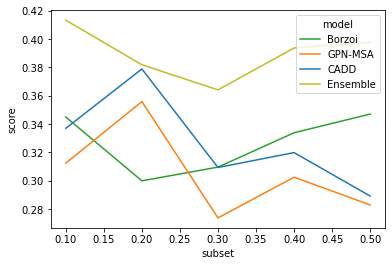

In [12]:
sns.lineplot(
    data=df,
    x="subset",
    y="score",
    hue="model",
    #style="model",
    #markers=True,
    #dashes=False,
    palette=palette,
)

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

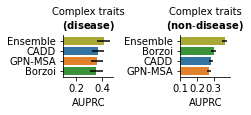

In [46]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    col="subset",
    #margin_titles=True,
    #sharex="col",
    sharex=False,
    sharey=False,
    height=1.7,
    #aspect=1.8,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="model",
        x="AUPRC",
        ax=ax,
        palette=palette,
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    #fontweight="bold",
    #size=12,
)
g.tight_layout()
#plt.savefig("../../results/plots/performance_disease.pdf", bbox_inches="tight")

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

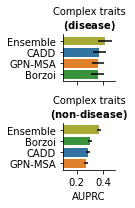

In [47]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    row="subset",
    #margin_titles=True,
    #sharex="col",
    sharex=True,
    sharey=False,
    height=1.5,
    aspect=1.2,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="model",
        x="AUPRC",
        ax=ax,
        palette=palette,
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    #fontweight="bold",
    #size=12,
)
g.tight_layout()
#plt.savefig("../../results/plots/performance_disease.pdf", bbox_inches="tight")

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

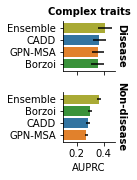

In [72]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    col="dataset",
    row="subset",
    margin_titles=True,
    #sharex="col",
    sharex=True,
    sharey=False,
    height=1.3,
    aspect=1.5,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="model",
        x="AUPRC",
        ax=ax,
        palette=palette,
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    fontweight="bold",
    #size=12,
)
g.tight_layout()
#plt.savefig("../../results/plots/performance_disease.pdf", bbox_inches="tight")